Visualizations are one of the most powerful tools at our disposal for exploring data and communicating data insights. Let's start by loading some packages, as well as a "Diamonds" data set which we'll use as a sample data set for plotting:

In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# Loading the data into the notebook
df = pd.read_csv('diamonds.csv')

In [3]:
# Looking at the dataset 
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
# Calculating the number of rows and columns into our dataset 
df.shape

(53940, 11)

In [5]:
df.size 

593340

In [6]:
df.info()# checking the complete information of the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df.isnull().sum() # no missing values in the dataset 

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [9]:
df[df.duplicated()] # no duplicate entry in the dataset 

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


* Since our dataset is cleaned so we can start anlysing the data 

**Histograms**

A histogram is a univariate plot (a plot that displays one variable) that groups a numeric variable into bins and displays the number of observations that fall within each bin. A histogram is a useful tool for getting a sense of the distribution of a numeric variable. Let's create a histogram of diamond carat weight with the df.hist() function:

array([[<AxesSubplot:title={'center':'carat'}>]], dtype=object)

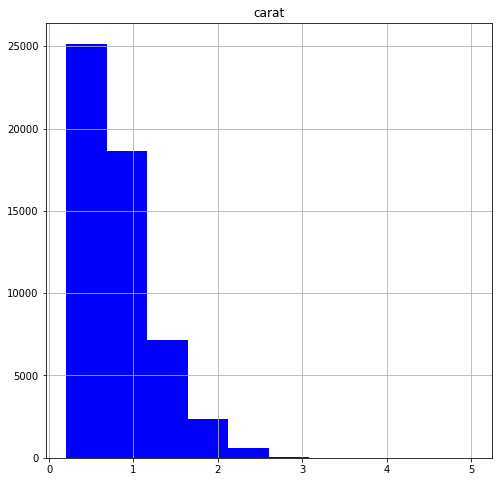

In [13]:
df.hist(column = 'carat',
       figsize = (8,8),
       color = 'blue')

In [15]:
df['carat'].value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: carat, Length: 273, dtype: int64

We see immediately that the carat weights are positively skewed: most diamonds are around 1 carat or below but there are extreme cases of larger diamonds.

The plot above has fairly wide bins and there doesn't appear to be any data beyond a carat size of 3.5. We can make try to get more out of hour histogram by adding some additional arguments to control the size of the bins and limits of the x-axis:

array([[<AxesSubplot:title={'center':'carat'}>]], dtype=object)

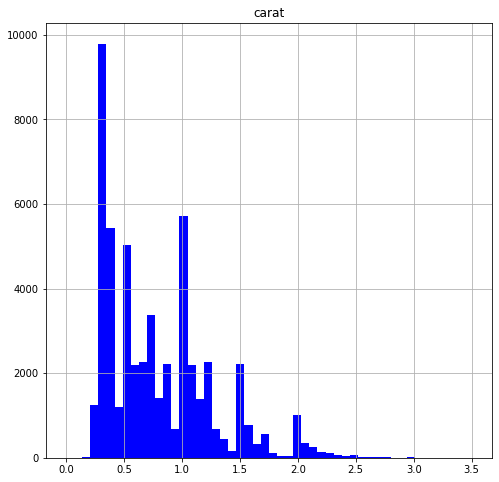

In [17]:
df.hist(column = 'carat',
       figsize = (8,8),
       color = 'blue',
       bins = 50,
       range = (0,3.5))

This histogram gives us a better sense of some subtleties within the distribution, but we can't be sure that it contains all the data. Limiting the X-axis to 3.5 might have cut out some outliers with counts so small that they didn't show up as bars on our original chart. Let's check to see if any diamonds are larger than 3.5 carats:

In [18]:
df[df['carat']>3.5]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
23644,23645,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,26000,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,26445,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26534,26535,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27130,27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27415,27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27679,27680,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


* So we are having total 9 diamonds that are having the carat weigth >3.5
* Should cutting these diamonds out concern us? On one hand, these outliers have very little bearing on the shape of the distribution. On the other hand, limiting the X-axis to 3.5 implies that no data lies beyond that point. For our own exploratory purposes this is not an issue but if we were to show this plot to someone else, it could be misleading. Including a note that 9 diamonds lie beyond the chart range could be helpful.

**Boxplots**

Boxplots are another type of univariate plot for summarizing distributions of numeric data graphically. Let's make a boxplot of carat using the pd.boxplot() function:

<AxesSubplot:>

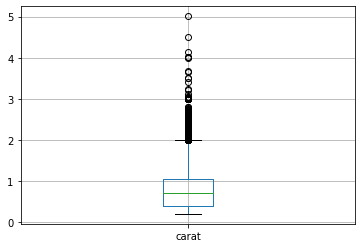

In [20]:
df.boxplot(column = 'carat')

the central box of the boxplot represents the middle 50% of the observations, the central bar is the median and the bars at the end of the dotted lines (whiskers) encapsulate the great majority of the observations. Circles that lie beyond the end of the whiskers are data points that may be outliers.

In this case, our data set has over 50,000 observations and we see many data points beyond the top whisker. We probably wouldn't want to classify all of those points as outliers, but the handful of diamonds at 4 carats and above are definitely far outside the norm.

One of the most useful features of a boxplot is the ability to make side-by-side boxplots. A side-by-side boxplot takes a numeric variable and splits it on based on some categorical variable, drawing a different boxplot for each level of the categorical variable. Let's make a side-by-side boxplot of diamond price split by diamond clarity:

<AxesSubplot:title={'center':'price'}, xlabel='clarity'>

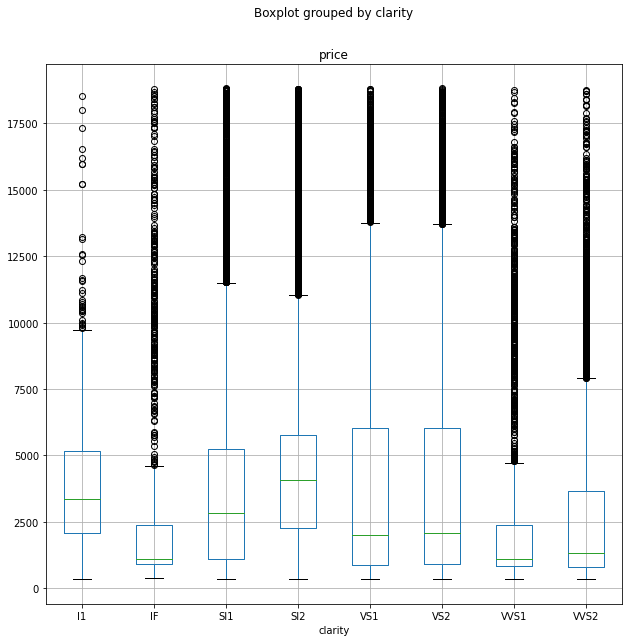

In [21]:
df.boxplot(column = 'price',
          by = 'clarity',
          figsize = (10,10))

The boxplot above is curious: we'd expect diamonds with better clarity to fetch higher prices and yet diamonds on the highest end of the clarity spectrum (IF = internally flawless) actually have lower median prices than low clarity diamonds! What gives? Perhaps another boxplot can shed some light on this situation:

<AxesSubplot:title={'center':'carat'}, xlabel='clarity'>

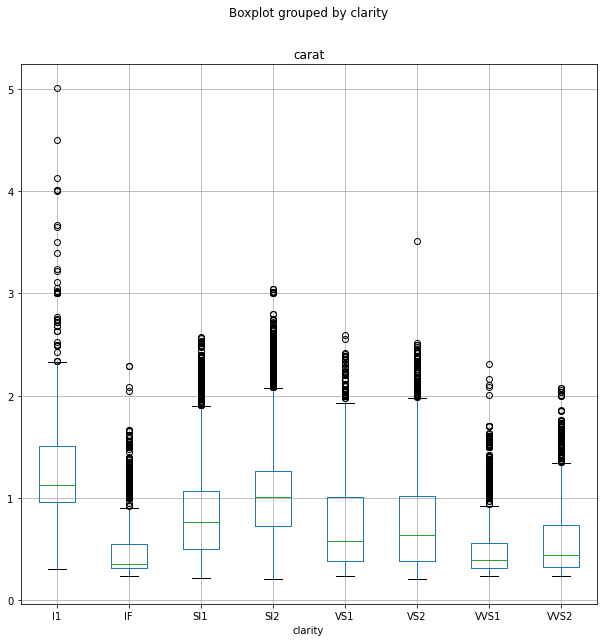

In [22]:
df.boxplot(column = 'carat',
          by  = 'clarity',
          figsize = (10,10))

* The plot above shows that diamonds with low clarity ratings also tend to be larger. Since size is an important factor in determining a diamond's value, it isn't too surprising that low clarity diamonds have higher median prices.

**Density Plots**

A density plot shows the distribution of a numeric variable with a continuous curve. It is similar to a histogram but without discrete bins, a density plot gives a better picture of the underlying shape of a distribution. Create a density plot with series.plot(kind="density")

<AxesSubplot:ylabel='Density'>

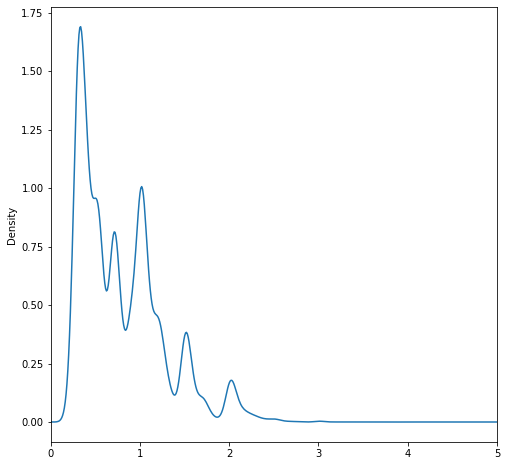

In [23]:
df['carat'].plot(kind = 'density',
                figsize = (8,8),
                xlim = (0,5))

**Barplots**

Barplots are graphs that visually display counts of categorical variables. We can create a barplot by creating a table of counts for a certain variable using the pd.crosstab() function and then passing the counts to df.plot(kind="bar"):

In [24]:
df.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [35]:
clarity_table = pd.crosstab(index = df['clarity'],
                         columns = 'count')
clarity_table = clarity_table.sort_values(by = 'count',ascending = False)
clarity_table 

col_0,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


<AxesSubplot:xlabel='clarity'>

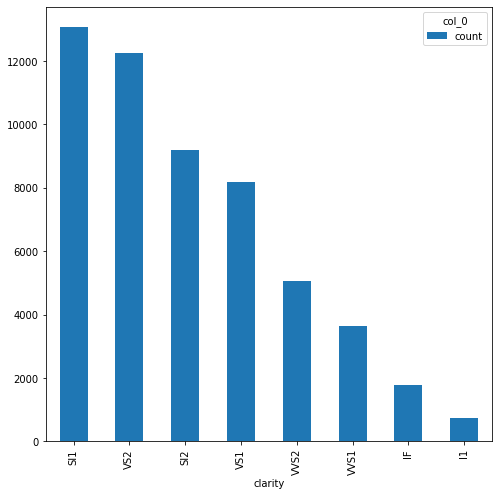

In [37]:
clarity_table.plot(kind = 'bar',
                figsize = (8,8))

We can use a two dimensional table to create a stacked barplot. Stacked barplots show the distribution of a second categorical variable within each bar:

In [42]:
carat_table  = pd.crosstab(index= df['clarity'],
                          columns = df['color'])
carat_table

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,42,102,143,150,162,92,50
IF,73,158,385,681,299,143,51
SI1,2083,2426,2131,1976,2275,1424,750
SI2,1370,1713,1609,1548,1563,912,479
VS1,705,1281,1364,2148,1169,962,542
VS2,1697,2470,2201,2347,1643,1169,731
VVS1,252,656,734,999,585,355,74
VVS2,553,991,975,1443,608,365,131


<AxesSubplot:xlabel='clarity'>

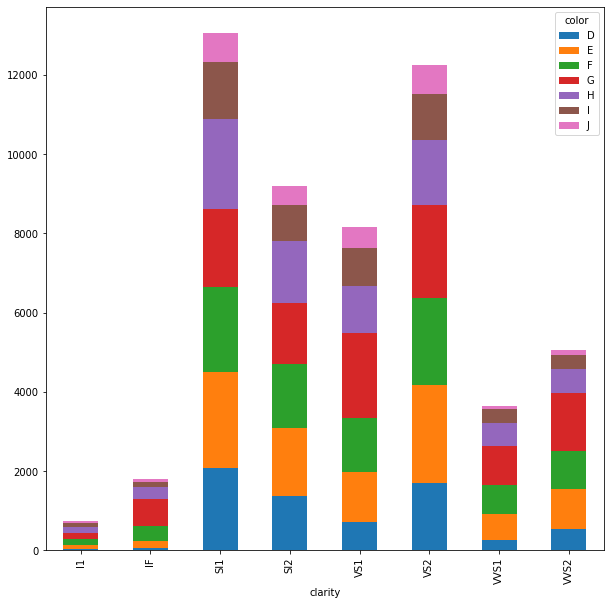

In [45]:
carat_table.plot(kind = 'bar',
                figsize = (10,10),
                stacked = True)

A grouped barplot is an alternative to a stacked barplot that gives each stacked section its own bar. To make a grouped barplot, do not include the stacked argument (or set stacked=False):

<AxesSubplot:xlabel='clarity'>

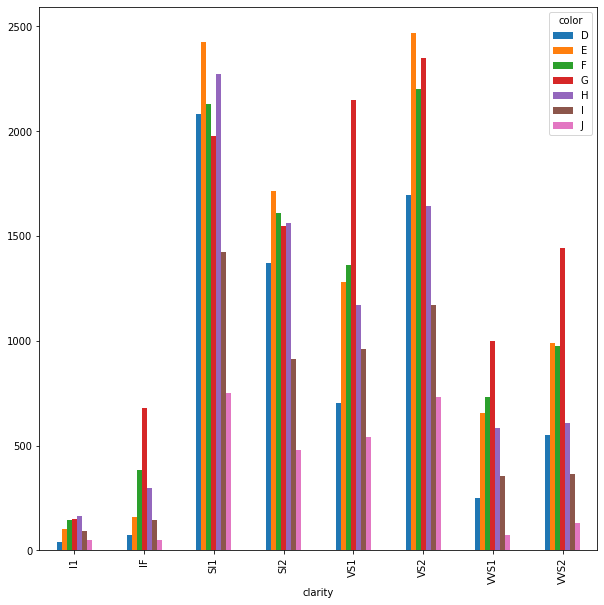

In [46]:
carat_table.plot(kind = 'bar',
                figsize  = (10,10))

**Scatterplots**

Scatterplots are bivariate (two variable) plots that take two numeric variables and plot data points on the x/y plane. To create a single scatterplot, use df.plot(kind="scatter"):

<AxesSubplot:xlabel='carat', ylabel='price'>

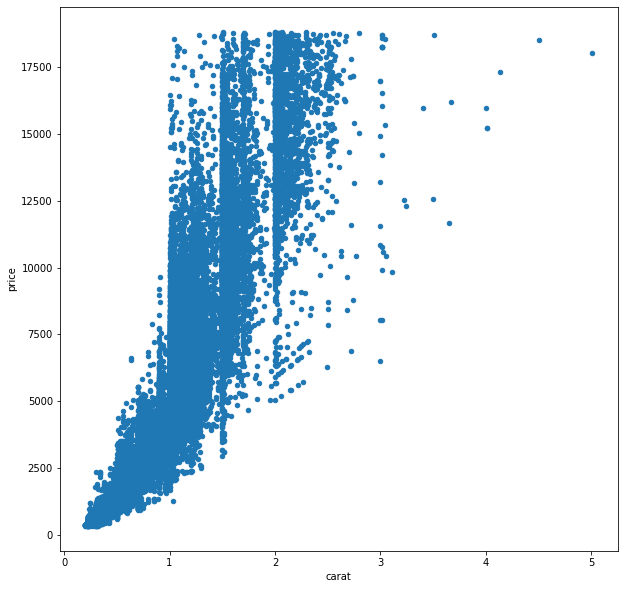

In [47]:
df.plot(kind = 'scatter',
       x = 'carat',
       y = 'price',
       figsize = (10,10))

* Although the scatterplot above has many overlapping points, it still gives us some insight into the relationship between diamond carat weight and price: bigger diamonds are generally more expensive.

**Line Plots**

Line plots are charts used to show the change in a numeric variable based on some other ordered variable. Line plots are often used to plot time series data to show the evolution of a variable over time. Line plots are the default plot type when using df.plot() so you don't have to specify the kind argument when making a line plot in pandas. Let's create some fake time series data and plot it with a line plot:

<AxesSubplot:xlabel='years'>

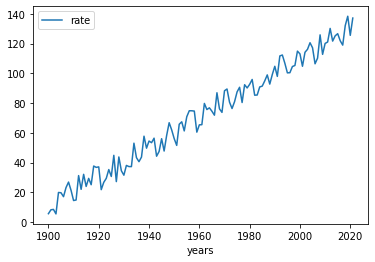

In [61]:
# Creating some random data

years = [y for y in range(1900,2022)]

rate = [(y+np.random.uniform(0,20)-1900) for y in years]
df1 = pd.DataFrame({
    'years':years,
    'rate' : rate
})
df1.plot(x= 'years',
        y = 'rate')

**Saving Plots**

If we want to save plots for later use, we can export the plot figure (plot information) to a file. First get the plot figure with plot.get_figure() and then save it to a file with figure.savefig("filename"). we can save plots to a variety of common image file formats, such as png, jpeg and pdf.

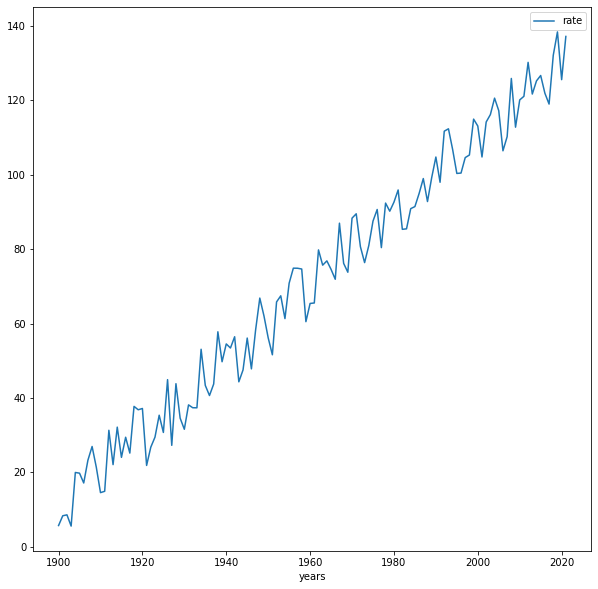

In [65]:
plot = df1.plot(x = 'years',
        y = 'rate',
       figsize = (10,10))

my_fig = plot.get_figure()

my_fig.savefig('Lineplot.png')